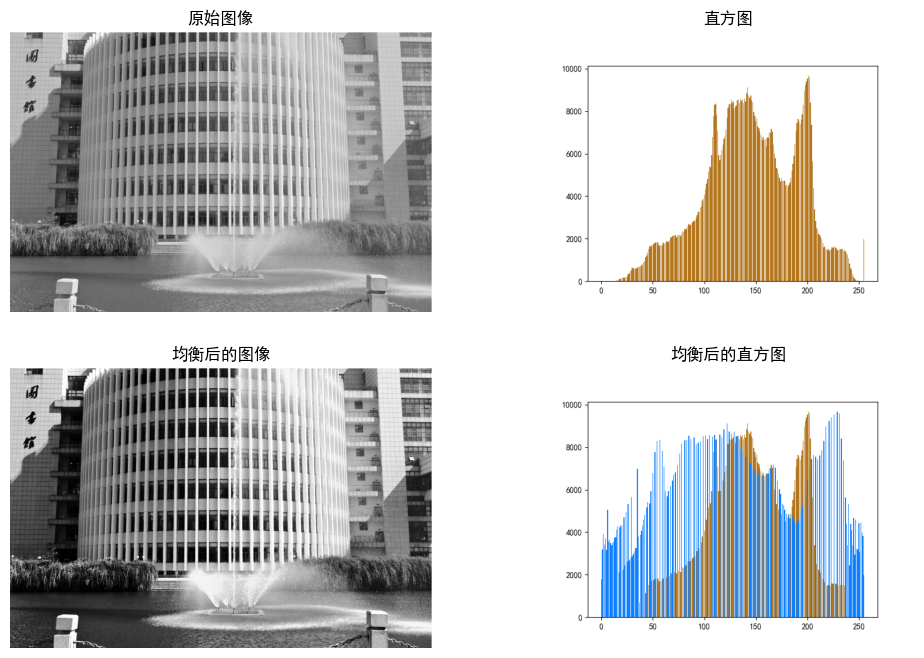

In [4]:
#灰度图像的直方图统计和均衡

#导入库
import cv2
import numpy as np
import matplotlib.pyplot as plt
import collections
 
#直方图均衡化
def histogram_equalization(histogram_e, lut_e, image_e):
    sum_temp = 0
    cf = []
    for i in histogram_e:
        sum_temp += i
        cf.append(sum_temp)
    for i, v in enumerate(lut_e):
        lut_e[i] = int(255.0 * (cf[i] / sum_temp) + 0.5)
    equalization_result = lut_e[image_e]
    return equalization_result
 
# 计算灰度图的直方图
def draw_histogram(grayscale):
    gray_key = []
    gray_count = []
    gray_result = []
    histogram_gray = list(grayscale.ravel())  # 将多维数组转换成一维数组
    gray = dict(collections.Counter(histogram_gray))  # 统计图像中每个灰度级出现的次数
    gray = sorted(gray.items(), key=lambda item: item[0])  # 根据灰度级大小排序
    for element in gray:
        key = list(element)[0]
        count = list(element)[1]
        gray_key.append(key)
        gray_count.append(count)
    for i in range(0, 256):
        if i in gray_key:
            num = gray_key.index(i)
            gray_result.append(gray_count[num])
        else:
            gray_result.append(0)
    gray_result = np.array(gray_result)
    return gray_result
 
x = []
for i in range(0, 256):  # 横坐标
    x.append(i)
 
#读取图像
 
original = cv2.imread("D:/picture/school.png")
original_gray = cv2.cvtColor(original, cv2.COLOR_BGR2GRAY)   #将图像从RGB颜色空间转换到灰度颜色空间
 
 
histogram = draw_histogram(original_gray)  # 直方图转化
 
plt.bar(x, histogram)  # 绘制原图直方图
plt.savefig('D:/picture/before_histogram.png')# 这里暂时不关闭绘制直方图的窗口，在处理图片后，再在该窗口绘制直方图作对比
 
before_histogram=cv2.imread(r'D:\picture\before_histogram.png')
 
lut = np.zeros(256, dtype=original_gray.dtype)  # 创建空的查找表,返回image类型的用0填充的数组；
result = histogram_equalization(histogram, lut, original_gray)  # 均衡化处理
 
 
histogram_equ = draw_histogram(result)  # 直方图转化
plt.bar(x, histogram_equ)  # 绘制处理后图像直方图
plt.savefig('D:/picture/after_histogram.png')
plt.close()#关闭绘制直方图的窗口
after_histogram=cv2.imread(r'D:\picture\after_histogram.png')
plt.rcParams['font.sans-serif'] = ['SimHei']  # 使用黑体字体显示中文
plt.rcParams['axes.unicode_minus'] = False    # 解决负号显示问题
plt.figure(figsize=(12, 8)) 
#展示结果
plt.subplot(221),plt.imshow(original_gray,cmap='gray')
plt.title('原始图像')
plt.axis('off')
 
 
plt.subplot(222),plt.imshow(before_histogram,cmap='gray')
plt.title('直方图')
plt.axis('off')
 
 
plt.subplot(223),plt.imshow(result,cmap='gray')
plt.title('均衡后的图像')
plt.axis('off')
 
 
plt.subplot(224),plt.imshow(after_histogram,cmap='gray')
plt.title('均衡后的直方图')
plt.axis('off')
plt.show()

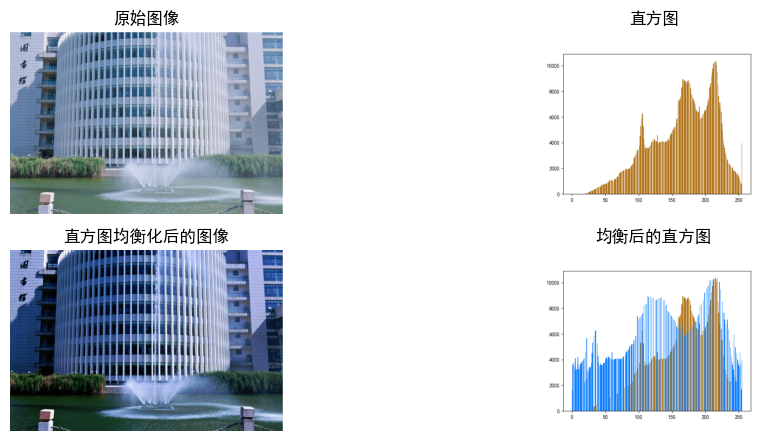

In [3]:
#RGB图像直方图均衡


#导入库
import cv2
import numpy as np
import matplotlib.pyplot as plt
import collections
 
#直方图均衡化
def histogram_equalization(histogram_e, lut_e, image_e):
    sum_temp = 0
    cf = []
    for i in histogram_e:
        sum_temp += i
        cf.append(sum_temp)
    for i, v in enumerate(lut_e):
        lut_e[i] = int(255.0 * (cf[i] / sum_temp) + 0.5)
    equalization_result = lut_e[image_e]
    return equalization_result
 
# 计算灰度图的直方图
def draw_histogram(grayscale):
    # 对图像进行通道拆分
    hsi_i = grayscale[:, :, 2]
    color_key = []
    color_count = []
    color_result = []
    histogram_color = list(hsi_i.ravel())  # 将多维数组转换成一维数组
    color = dict(collections.Counter(histogram_color))  # 统计图像中每个亮度级出现的次数
    color = sorted(color.items(), key=lambda item: item[0])  # 根据亮度级大小排序
    for element in color:
        key = list(element)[0]
        count = list(element)[1]
        color_key.append(key)
        color_count.append(count)
    for i in range(0, 256):
        if i in color_key:
            num = color_key.index(i)
            color_result.append(color_count[num])
        else:
            color_result.append(0)
    color_result = np.array(color_result)
    return color_result
 
x = []
for i in range(0, 256):  # 横坐标
    x.append(i)
 
# 原图及其直方图
origin = cv2.imread("D:/picture/school.png")
original = cv2.cvtColor(origin,cv2.COLOR_BGR2RGB)
 
histogram_original = draw_histogram(original)
plt.bar(x, histogram_original)  # 绘制原图直方图
plt.savefig('D:/picture/before_histogram.png')# 这里暂时不关闭绘制直方图的窗口，在处理图片后，再在该窗口绘制直方图作对比
 
before_histogram=cv2.imread(r'D:\picture\before_histogram.png')
 
 
lut = np.zeros(256, dtype=original.dtype)  # 创建空的查找表
rgb_histogram = histogram_equalization(histogram_original, lut, original)  # 均衡化处理
 
 
histogram_rgb_equalization = draw_histogram(rgb_histogram)
plt.bar(x, histogram_rgb_equalization)  # 绘制原图直方图
plt.savefig('D:/picture/rgb_after_histogram.png')
plt.close()#关闭绘制直方图的窗口
rgb_after_histogram=cv2.imread(r'D:\picture\rgb_after_histogram.png')
 
plt.rcParams['font.sans-serif'] = ['SimHei']  # 使用黑体字体显示中文
plt.rcParams['axes.unicode_minus'] = False    # 解决负号显示问题
plt.figure(figsize=(12, 8))
#展示结果
plt.subplot(321),plt.imshow(original,cmap='gray')
plt.title('原始图像')
plt.axis('off')
 
 
plt.subplot(322),plt.imshow(before_histogram,cmap='gray')
plt.title('直方图')
plt.axis('off')
 
 
plt.subplot(323),plt.imshow(rgb_histogram,cmap='gray')
plt.title('直方图均衡化后的图像')
plt.axis('off')
 
 
plt.subplot(324),plt.imshow(rgb_after_histogram,cmap='gray')
plt.title('均衡后的直方图')
plt.axis('off')
 
plt.show()
 

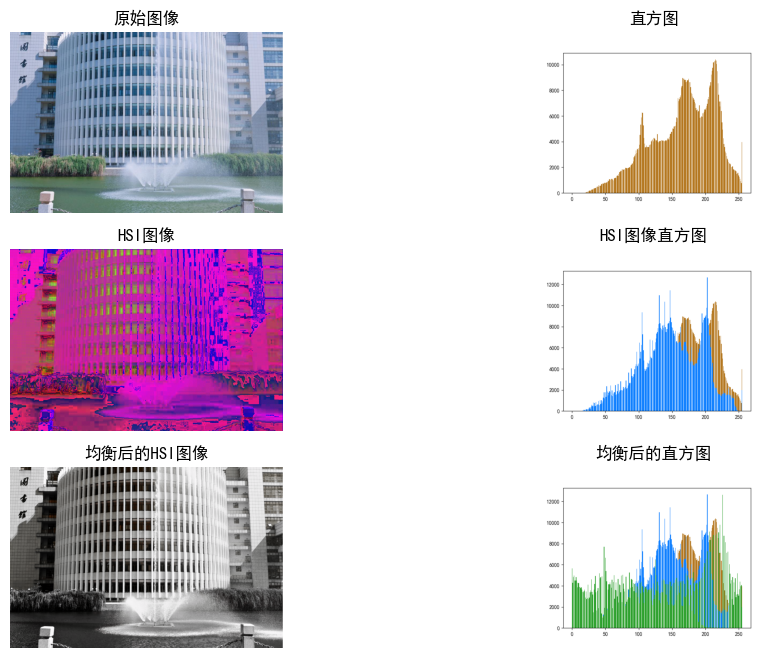

In [2]:
#HSI图像的直方图均衡
#导入库
import cv2
import numpy as np
import matplotlib.pyplot as plt
import collections
from numpy import cos, arccos, sqrt, power, pi
 
def histogram_equalization(histogram_e, lut_e, image_e):
    sum_temp = 0
    cf = []
    for i in histogram_e:
        sum_temp += i
        cf.append(sum_temp)
    for i, v in enumerate(lut_e):
        lut_e[i] = int(255.0 * (cf[i] / sum_temp) + 0.5)
    equalization_result = lut_e[image_e]
    return equalization_result
 
# 计算灰度图的直方图
def draw_histogram(grayscale):
    # 对图像进行通道拆分
    hsi_i = grayscale[:, :, 2]
    color_key = []
    color_count = []
    color_result = []
    histogram_color = list(hsi_i.ravel())  # 将多维数组转换成一维数组
    color = dict(collections.Counter(histogram_color))  # 统计图像中每个亮度级出现的次数
    color = sorted(color.items(), key=lambda item: item[0])  # 根据亮度级大小排序
    for element in color:
        key = list(element)[0]
        count = list(element)[1]
        color_key.append(key)
        color_count.append(count)
    for i in range(0, 256):
        if i in color_key:
            num = color_key.index(i)
            color_result.append(color_count[num])
        else:
            color_result.append(0)
    color_result = np.array(color_result)
    return color_result
 
#  HSI转RGB
def hsi_rgb(hsi):
    if hsi.dtype.type == np.uint8:
        hsi = (hsi).astype('float64') / 255.0
    for k in range(hsi.shape[0]):
        for j in range(hsi.shape[1]):
            h, s, i = hsi[k, j, 0], hsi[k, j, 1], hsi[k, j, 2]
            r, g, b = 0, 0, 0
            if 0 <= h < 2/3*pi:
                b = i * (1 - s)
                r = i * (1 + s * cos(h) / cos(pi/3-h))
                g = 3 * i - (b + r)
            elif 2/3*pi <= h < 4/3*pi:
                r = i * (1 - s)
                g = i * (1 + s * cos(h-2/3*pi) / cos(pi - h))
                b = 3 * i - (r + g)
            elif 4/3*pi <= h <= 5/3*pi:
                g = i * (1 - s)
                b = i * (1 + s * cos(h - 4/3*pi) / cos(5/3*pi - h))
                r = 3 * i - (g + b)
            hsi[k, j, 0], hsi[k, j, 1], hsi[k, j, 2] = r, g, b
    return (hsi * 255).astype('uint8')
 
#  RGB转HSI
def rgb_hsi(rgb):
    # 如果没有归一化处理，则需要进行归一化处理（传入的是[0,255]范围值）
    if rgb.dtype.type == np.uint8:
        rgb = rgb.astype('float64')/255.0
    for i in range(rgb.shape[0]):
        for j in range(rgb.shape[1]):
            r, g, b = rgb[i, j, 0], rgb[i, j, 1], rgb[i, j, 2]
            # 计算h
            num = 0.5 * ((r-g)+(r-b))
            den = sqrt(power(r-g, 2)+(r-b)*(g-b))
            theta = arccos(num/den) if den != 0 else 0
            rgb[i, j, 0] = theta if b <= g else (2*pi-theta)
            # 计算s
            rgb[i, j, 1] = (1 - 3 * min([r, g, b]) / (r+g+b)) if r+g+b != 0 else 0
            # 计算i
            rgb[i, j, 2] = 1 / 3 * (r+g+b)
    return (rgb * 255).astype('uint8')
    
x = []
for i in range(0, 256):  # 横坐标
    x.append(i)
 
# 原图及其直方图
origin = cv2.imread("D:/picture/school.png")
original = cv2.cvtColor(origin,cv2.COLOR_BGR2RGB)
 
histogram_original = draw_histogram(original)
plt.bar(x, histogram_original)  # 绘制原图直方图
plt.savefig('D:/picture/before_histogram.png')
before_histogram=cv2.imread(r'D:\picture\before_histogram.png')
 
# rgb转hsi
#hsi_original = cv2.cvtColor(original, cv2.COLOR_RGB2HSV_FULL)
hsi_original = rgb_hsi(original)
 
# hsi在亮度分量上均衡化
histogram_hsi_original = draw_histogram(hsi_original)
plt.bar(x, histogram_hsi_original)  # 绘制直方图
plt.savefig('D:/picture/hsi_before_histogram.png')
hsi_before_histogram=cv2.imread(r'D:\picture\hsi_before_histogram.png')
 
lut = np.zeros(256, dtype=hsi_original.dtype)  # 创建空的查找表
hsi_histogram = histogram_equalization(histogram_hsi_original, lut, hsi_original)  # 均衡化处理
 
# hsi转rgb
#result=cv2.cvtColor(hsi_histogram,cv2.COLOR_HSV2RGB_FULL)
result = hsi_rgb(hsi_histogram)
 
histogram_hsi_equalization = draw_histogram(result)
plt.bar(x, histogram_hsi_equalization)  # 绘制原图直方图
plt.savefig('D:/picture/hsi_after_histogram.png')
plt.close()#关闭绘制直方图的窗口
hsi_after_histogram=cv2.imread(r'D:\picture\hsi_after_histogram.png')


plt.rcParams['font.sans-serif'] = ['SimHei']  # 使用黑体字体显示中文
plt.rcParams['axes.unicode_minus'] = False    # 解决负号显示问题
plt.figure(figsize=(12, 8))
#展示结果
plt.subplot(321),plt.imshow(original,cmap='gray')
plt.title('原始图像')
plt.axis('off')
 
 
plt.subplot(322),plt.imshow(before_histogram,cmap='gray')
plt.title('直方图')
plt.axis('off')
 
 
plt.subplot(323),plt.imshow(hsi_original,cmap='gray')
plt.title('HSI图像')
plt.axis('off')
 
 
plt.subplot(324),plt.imshow(hsi_before_histogram,cmap='gray')
plt.title('HSI图像直方图')
plt.axis('off')
 
 
plt.subplot(325),plt.imshow(result,cmap='gray')
plt.title('均衡后的HSI图像')
plt.axis('off')
 
 
plt.subplot(326),plt.imshow(hsi_after_histogram,cmap='gray')
plt.title('均衡后的直方图')
plt.axis('off')
 
plt.show()